# Brownian Motion

we have to simulate 
$$
    v_{i + 1} = v_{i} - \frac{\gamma}{m} v_i dt + \sqrt{2 \gamma T}\ dW_i
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nsim  = 5         # Number of simulations
Tmax  = 100       # Total simulation time 
dt    = 0.001     # timestep
time  = np.arange(0, Tmax, dt)

gamma = 5.0       # friction constant
m     = 0.1       # mass of particle
T     = 2.0       # Temperature

# Initial velocity is sampled from equilibrium distribution
v = np.zeros((len(time), nsim), dtype=np.float64)
v[0,:] = np.sqrt(T/m)*np.random.normal(size=nsim)
# Initial position is at origin 
x = np.zeros((len(time), nsim), dtype=np.float64)

# start of simulation
for i in range(1, len(time)):
    # Velocity update
    v[i, :] = v[i-1, :] - gamma/m*v[i-1, :]*dt + np.sqrt(2*gamma*T*dt)*np.random.normal(size=nsim)
    # Position update
    x[i, :] = x[i-1, :] + v[i, :]*dt

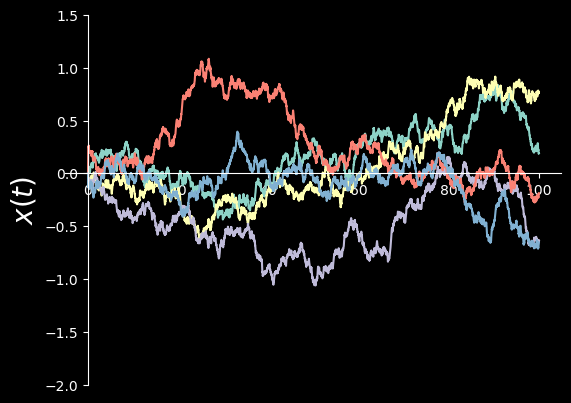

In [7]:
plt.style.use('dark_background')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('data',0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_ylim((-2, 1.5))
ax.set_ylabel("$x(t)$", fontsize=20)
plt.plot(time, x)
plt.show()